In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import tensorflow as tf
from tensorflow import keras as ks

from utils import load_training_data, load_testing_data, load_partition

In [4]:
# Split training and testing into an 80/20 split
X_train, X_val, y_train, y_val = load_training_data(0.2)

# merge training and validation (tensorflow will handle that for us)
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

# load test data
X_test, y_test = load_testing_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[1].shape)

(2870, 160, 160)
(394, 160, 160)
(2870,)
(394,)
(160, 160)


In [5]:
model = ks.Sequential([
    ks.layers.Flatten(input_shape=(160, 160)),
    ks.layers.Dense(128, activation='relu'),
    ks.layers.Dense(4)
])

model.compile(
    optimizer='adam',
    loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

num_epochs = 100

history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4812 - loss: 2.0136 - val_accuracy: 0.3274 - val_loss: 2.7241
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6828 - loss: 0.7806 - val_accuracy: 0.4315 - val_loss: 1.9709
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7553 - loss: 0.6044 - val_accuracy: 0.5305 - val_loss: 2.0325
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8245 - loss: 0.4625 - val_accuracy: 0.5228 - val_loss: 2.1736
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8477 - loss: 0.4015 - val_accuracy: 0.6041 - val_loss: 2.0937
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8772 - loss: 0.3508 - val_accuracy: 0.5914 - val_loss: 2.1606
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8955 - loss: 0.2981 - val_accuracy: 0.6193 - val_loss: 2.0514
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8851 - loss: 0.2943 - val_accuracy: 0.6320 - val_loss: 2.4

In [6]:
# Test the model on unseen data
test_loss, test_acc = model.evaluate(X_test, y_test)


print(test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5563 - loss: 13.7061 
0.7284263968467712


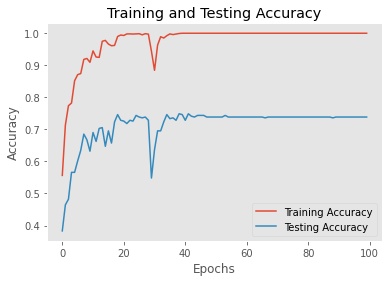

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(num_epochs)

plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Testing Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
#plt.show()
plt.savefig("./img/ML.jpg")

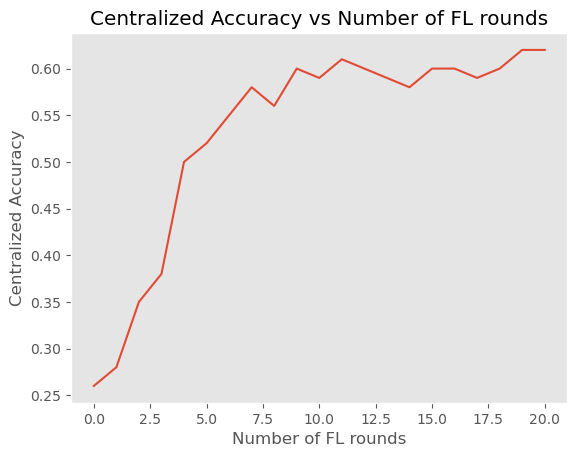

In [9]:
num_rounds = range(21)
accs = [0.26, 0.28, 0.35, 0.38, 0.5, 0.52, 0.55, 0.58, 0.56, 0.60, 0.59, 0.61, 0.60, 0.59, 0.58, 0.60, 0.60, 0.59, 0.60, 0.62, 0.62]

plt.plot(num_rounds, accs, label="Centralized Accuracy")
plt.xlabel("Number of FL rounds")
plt.ylabel("Centralized Accuracy")
plt.title("Centralized Accuracy vs Number of FL rounds")
plt.grid()
plt.savefig("./img/FL.jpg")
#plt.show()

## One Partition/Client demonstration

Epoch 1/50
 1/23 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.4688 - loss: 1.3176

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4117 - loss: 3.1942 - val_accuracy: 0.3071 - val_loss: 2.3202
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5514 - loss: 1.0993 - val_accuracy: 0.3376 - val_loss: 2.9420
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7067 - loss: 0.7609 - val_accuracy: 0.3731 - val_loss: 3.4973
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7291 - loss: 0.6335 - val_accuracy: 0.4391 - val_loss: 2.3563
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8509 - loss: 0.4472 - val_accuracy: 0.4594 - val_loss: 2.7267
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8726 - loss: 0.4008 - val_accuracy: 0.4289 - val_loss: 3.1783
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9192 - loss: 0.3278 - val_accuracy: 0.4391 - val_loss: 2.9284
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9301 - loss: 0.2908 - val_accuracy: 0.4162 - val_loss: 4.3150
Epo

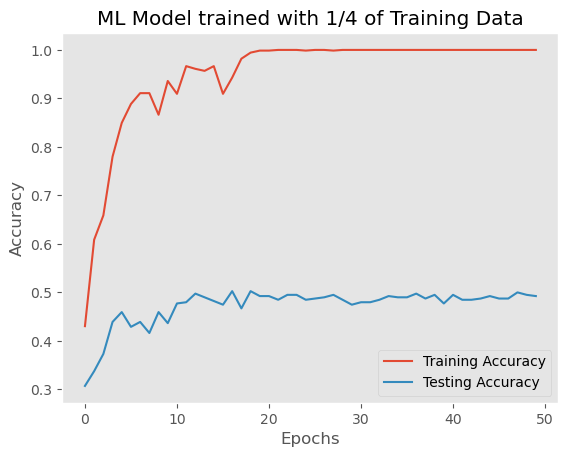

In [10]:
# Split training and testing into an 80/20 split
X_train, X_val, y_train, y_val = load_partition(0)

# merge training and validation (tensorflow will handle that for us)
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

# load test data
X_test, y_test = load_testing_data()

model = ks.Sequential([
    ks.layers.Flatten(input_shape=(160, 160)),
    ks.layers.Dense(128, activation='relu'),
    ks.layers.Dense(4)
])

model.compile(
    optimizer='adam',
    loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

num_epochs = 50

history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(num_epochs)

plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Testing Accuracy")
plt.legend(loc="lower right")
plt.title("ML Model trained with 1/4 of Training Data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
#plt.show()
plt.savefig("./img/quarter_training_ML.jpg")

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3654 - loss: 8.8506  
Test Loss: 5.510325908660889
Test Accuracy: 0.49238577485084534


In [16]:
import matplotlib.pyplot as plt

# Assuming X_train contains your training images
example_image = X_train[0]  # Assuming you want to visualize the first image

# Plot the example image
plt.imshow(example_image, cmap='gray')
plt.axis('off')
plt.show()


NameError: name 'labels' is not defined

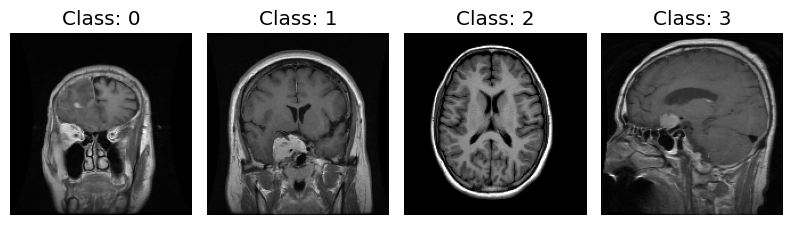

In [15]:
import matplotlib.pyplot as plt

# Assuming X_train contains your training images and y_train contains the corresponding labels
num_classes = len(np.unique(y_train))  # Get the number of unique classes

# Create a dictionary to store example images for each class
example_images = {}

# Find example images for each class
for class_label in range(num_classes):
    # Find the index of the first occurrence of the class label
    index = np.where(y_train == class_label)[0][0]
    # Store the corresponding image
    example_images[class_label] = X_train[index]

# Plot example images for each class
plt.figure(figsize=(10, 5))
for i, (class_label, example_image) in enumerate(example_images.items()):
    plt.subplot(2, 5, i + 1)  # Assuming there are 10 classes, adjust accordingly
    plt.imshow(example_image, cmap='gray')
    plt.title(f"Class: {class_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


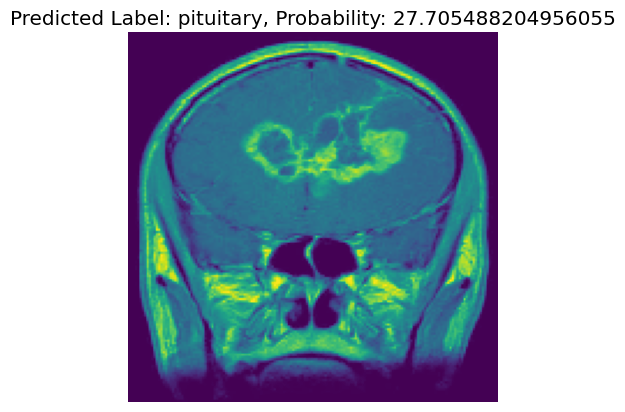

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
label_names = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
# Load and preprocess the image
image_path = 'data/Testing/glioma_tumor/image(1).jpg'  # Replace 'path_to_your_image.jpg' with the actual path
img = load_img(image_path, target_size=(160, 160), color_mode='grayscale')
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Perform inference
predictions = model.predict(img_array)
predicted_label_idx = np.argmax(predictions)
predicted_label = label_names[predicted_label_idx]  # Assuming label_names is defined elsewhere
probability = np.max(predictions)

# Display results
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}, Probability: {probability}')
plt.show()
